In [1]:
import pandas as pd
import os
from statistics import *

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
df_ibm = pd.read_csv('si-csvs/ibm.csv')
df_hp = pd.read_csv('si-csvs/hp.csv')
df_repet = pd.read_csv('si-csvs/repet.csv')
df_repetsim = pd.read_csv('si-csvs/repetsim.csv')
df_2dft = pd.read_csv('si-csvs/2dft.csv')
df_umx = pd.read_csv('si-csvs/umx.csv')

In [3]:
df_ibm['model'] = 'ibm'
df_hp['model'] = 'hp'
df_repet['model'] = 'repet'
df_repetsim['model'] = 'repetsim'
df_2dft['model'] = '2dft'
df_umx['model'] = 'umx'

In [4]:
frames = [df_ibm, df_hp, df_repet, df_repetsim, df_2dft, df_umx]

In [5]:
df = pd.concat(frames)

In [6]:
df

,source,file,MIX-SD-SDR,MIX-SI-SDR,MIX-SNR,SD-SDR,SD-SDRi,SI-SAR,SI-SDR,SI-SDRi,SI-SIR,SNR,SNRi,SRR,model
0,estimates/ibm/7. AlLevy - 3blind/left.wav,7. AlLevy - 3blind.json,-6.283529,-6.283270,-6.422302,11.152237,17.435766,11.222560,11.217971,17.501241,40.981541,11.441867,17.864169,29.394182,ibm
1,estimates/ibm/4. BitMidi - The-Lively-Boogie-N...,4. BitMidi - The-Lively-Boogie-Nights.json,-4.991467,-4.990582,-5.213894,8.243317,13.234784,8.394527,8.373505,13.364087,31.535454,8.805649,14.019543,23.493750,ibm
2,estimates/ibm/7. AlLevy - bounce/left.wav,7. AlLevy - bounce.json,-7.437467,-7.437453,-7.404342,10.982919,18.420387,11.157285,11.148236,18.585688,37.965293,11.445730,18.850071,25.235793,ibm
3,estimates/ibm/4. BitMidi - Moo-Cow-Boogie (1)/...,4. BitMidi - Moo-Cow-Boogie (1).json,-6.639543,-6.639484,-6.714266,11.636843,18.276386,11.706047,11.677359,18.316843,33.492520,11.853906,18.568172,31.935818,ibm
4,estimates/ibm/10. RTpress - BSant_sk/left.wav,10. RTpress - BSant_sk.json,-5.709202,-5.709034,-5.813574,10.181302,15.890504,10.289998,10.267529,15.976564,33.141410,10.548224,16.361798,27.300686,ibm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,estimates/umx/1. RobRio - R3OCKHOU/left.wav,1. RobRio - R3OCKHOU.json,-10.015416,-9.991565,-12.336029,4.568677,14.584093,4.587758,4.581615,14.573180,33.080266,4.284140,16.620169,29.835393,umx
26,estimates/umx/10. RTpress - piggy_sk/left.wav,10. RTpress - piggy_sk.json,-4.052168,-4.041213,-4.778031,3.608130,7.660298,9.635364,9.635260,13.676473,55.748620,-3.760466,1.017565,4.853972,umx
27,estimates/umx/7. AlLevy - mlboogie/left.wav,7. AlLevy - mlboogie.json,-5.488507,-5.449097,-7.199489,1.946464,7.434970,6.064437,5.954139,11.403236,21.961229,-6.467352,0.732137,4.146356,umx
28,estimates/umx/7. AlLevy - rhumb/left.wav,7. AlLevy - rhumb.json,-5.154110,-5.151894,-5.516683,13.342309,18.496418,13.342414,13.342390,18.494284,66.130199,13.333969,18.850652,60.357592,umx


In [7]:
df.drop(columns=['source'], inplace=True)

In [8]:
files_list = []
for i in df['file'].values:
    files_list.append(i[:-5])

In [9]:
df['file'] = files_list

In [10]:
df

,file,MIX-SD-SDR,MIX-SI-SDR,MIX-SNR,SD-SDR,SD-SDRi,SI-SAR,SI-SDR,SI-SDRi,SI-SIR,SNR,SNRi,SRR,model
0,7. AlLevy - 3blind,-6.283529,-6.283270,-6.422302,11.152237,17.435766,11.222560,11.217971,17.501241,40.981541,11.441867,17.864169,29.394182,ibm
1,4. BitMidi - The-Lively-Boogie-Nights,-4.991467,-4.990582,-5.213894,8.243317,13.234784,8.394527,8.373505,13.364087,31.535454,8.805649,14.019543,23.493750,ibm
2,7. AlLevy - bounce,-7.437467,-7.437453,-7.404342,10.982919,18.420387,11.157285,11.148236,18.585688,37.965293,11.445730,18.850071,25.235793,ibm
3,4. BitMidi - Moo-Cow-Boogie (1),-6.639543,-6.639484,-6.714266,11.636843,18.276386,11.706047,11.677359,18.316843,33.492520,11.853906,18.568172,31.935818,ibm
4,10. RTpress - BSant_sk,-5.709202,-5.709034,-5.813574,10.181302,15.890504,10.289998,10.267529,15.976564,33.141410,10.548224,16.361798,27.300686,ibm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,1. RobRio - R3OCKHOU,-10.015416,-9.991565,-12.336029,4.568677,14.584093,4.587758,4.581615,14.573180,33.080266,4.284140,16.620169,29.835393,umx
26,10. RTpress - piggy_sk,-4.052168,-4.041213,-4.778031,3.608130,7.660298,9.635364,9.635260,13.676473,55.748620,-3.760466,1.017565,4.853972,umx
27,7. AlLevy - mlboogie,-5.488507,-5.449097,-7.199489,1.946464,7.434970,6.064437,5.954139,11.403236,21.961229,-6.467352,0.732137,4.146356,umx
28,7. AlLevy - rhumb,-5.154110,-5.151894,-5.516683,13.342309,18.496418,13.342414,13.342390,18.494284,66.130199,13.333969,18.850652,60.357592,umx


In [11]:
from statistics import *
import scipy.stats as stats
metrics = ['SI-SDR', 'SI-SDRi', 'SNR', 'SNRi', 'SI-SIR', 'SI-SAR']
#metrics = ['SDR', 'SIR', 'SAR', 'ISR']

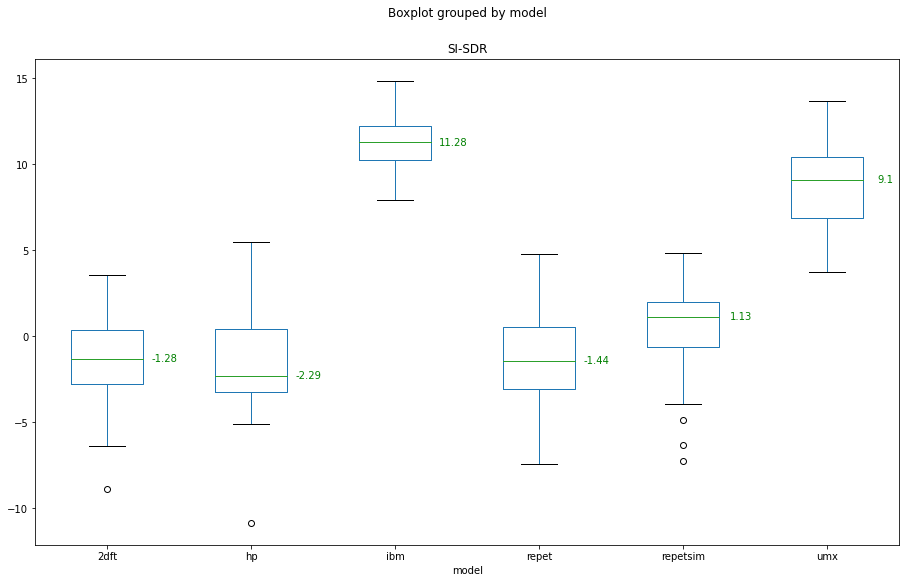

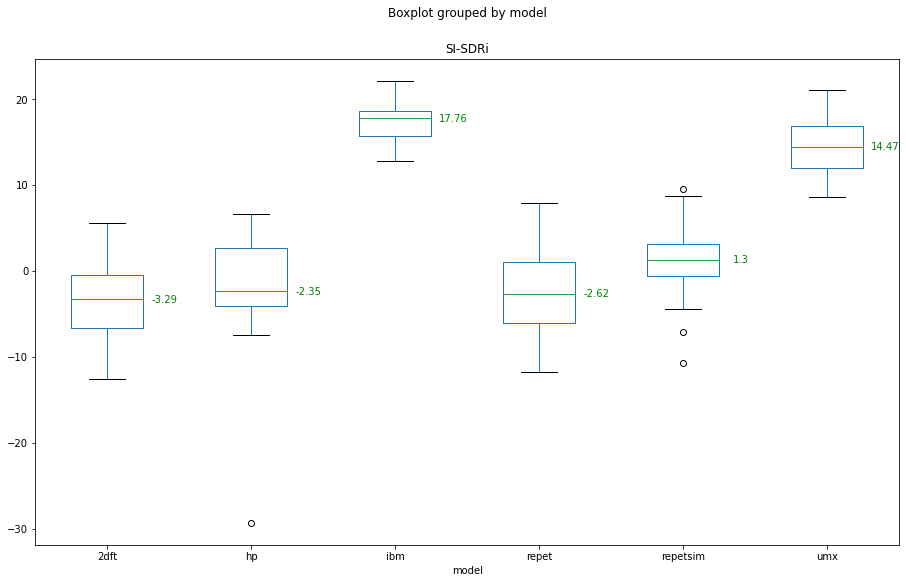

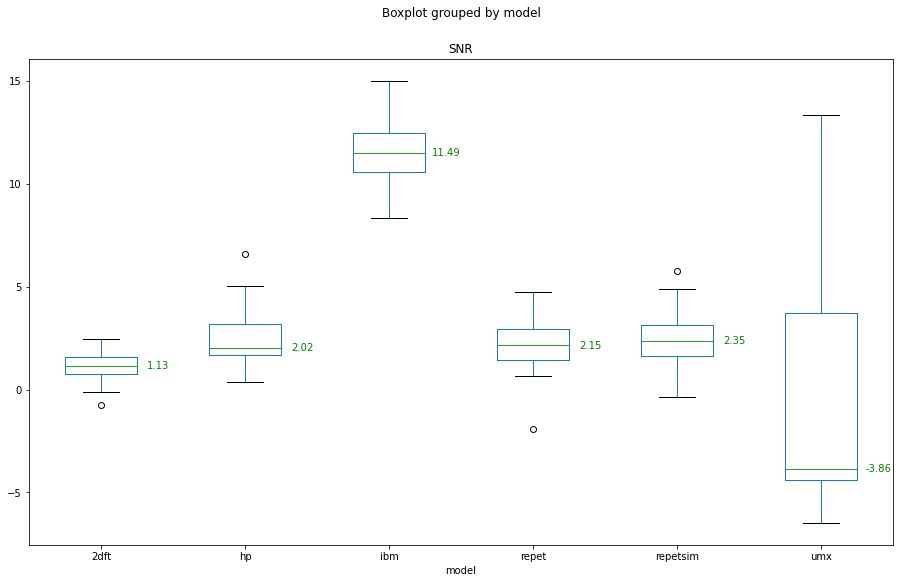

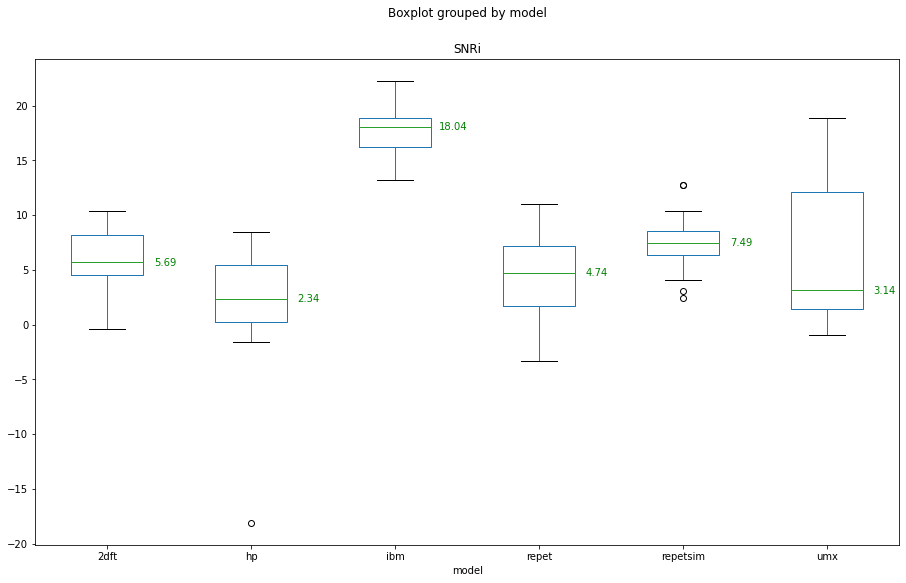

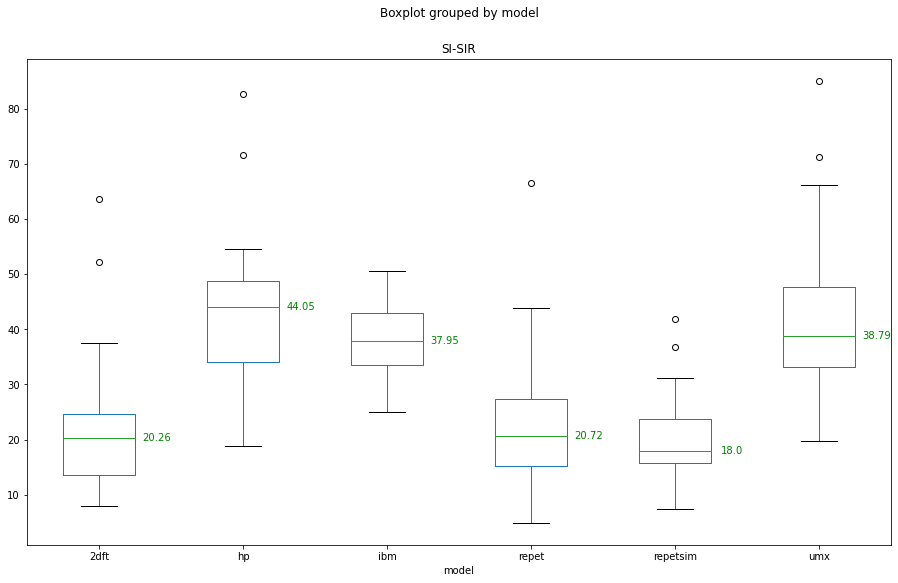

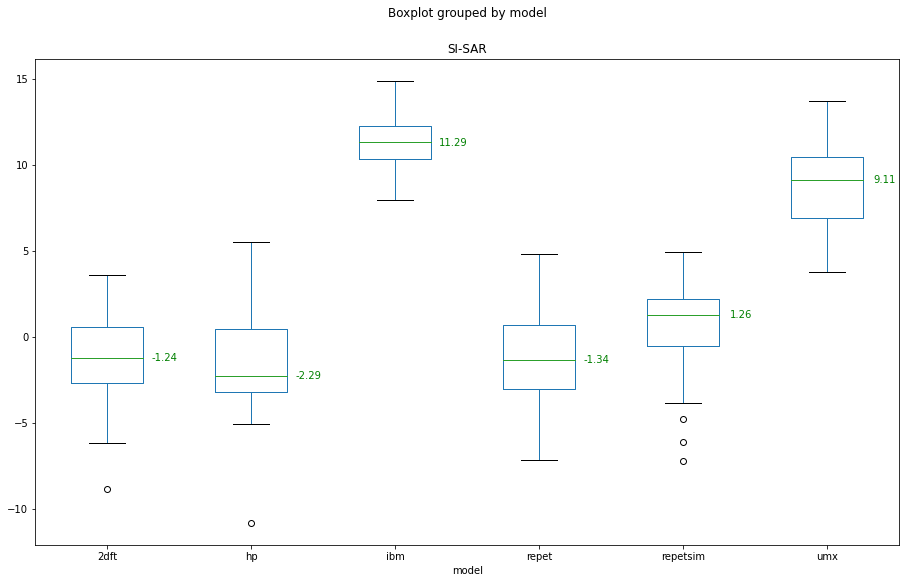

In [12]:
for metric in metrics:         
    df.boxplot(by='model', column=metric, grid=False, figsize=(15,9))

    plt.text(1.4, df_2dft[metric].median(), str(round(df_2dft[metric].median(),2)), ha='center', va='center', color='green')
    plt.text(2.4, df_hp[metric].median(), str(round(df_hp[metric].median(),2)), ha='center', va='center', color='green')
    plt.text(3.4, df_ibm[metric].median(), str(round(df_ibm[metric].median(),2)), ha='center', va='center', color='green')
    plt.text(4.4, df_repet[metric].median(), str(round(df_repet[metric].median(),2)), ha='center', va='center', color='green')
    plt.text(5.4, df_repetsim[metric].median(), str(round(df_repetsim[metric].median(),2)), ha='center', va='center', color='green')
    plt.text(6.4, df_umx[metric].median(), str(round(df_umx[metric].median(),2)), ha='center', va='center', color='green')

    if not os.path.exists('./figs/si-results/'):
        os.makedirs('./figs/si-results/')
        
    plt.savefig(fname='./figs/si-results/' + str(metric) +'.png', format='png')

In [13]:
methods = {'ibm':{}, 'hp':{}, 'repet':{}, 'repetsim':{}, '2dft':{}, 'umx':{}}

In [14]:
for i in methods.keys():
    sdr_test = df['SI-SDR'].loc[df['model'] == i].tolist()
    p = stats.shapiro(sdr_test).pvalue
    if p >= 0.05:
        methods[i]['SDR_normal'] = True
    else:
        methods[i]['SDR_normal'] = False
    
    sir_test = df['SI-SIR'].loc[df['model'] == i].tolist()
    p = stats.shapiro(sir_test).pvalue
    if p >= 0.05:
        methods[i]['SIR_normal'] = True
    else:
        methods[i]['SIR_normal'] = False
        
    sar_test = df['SI-SAR'].loc[df['model'] == i].tolist()
    p = stats.shapiro(sir_test).pvalue
    if p >= 0.05:
        methods[i]['SAR_normal'] = True
    else:
        methods[i]['SAR_normal'] = False

In [15]:
for i in methods.keys():
    subset = methods.copy()
    subset.pop(i)

    methods[i]['SDR_tests'] = {}
    methods[i]['SIR_tests'] = {}
    methods[i]['SAR_tests'] = {}
    for method in subset:
        a = df['SI-SDR'].loc[df['model'] == i].tolist()
        b = df['SI-SDR'].loc[df['model'] == method].tolist()
        
        if methods[i]['SDR_normal'] is True & subset[method]['SDR_normal'] is True:
            p = stats.ttest_ind(a,b, equal_var=False).pvalue
        else:
            p = stats.wilcoxon(a,b).pvalue
            
        methods[i]['SDR_tests'][method] = p
        
        c = df['SI-SIR'].loc[df['model'] == i].tolist()
        d = df['SI-SIR'].loc[df['model'] == method].tolist()
        if methods[i]['SIR_normal'] is True & subset[method]['SIR_normal'] is True:
            p = stats.ttest_ind(c,d, equal_var=False).pvalue
        else:
            p = stats.wilcoxon(c,d).pvalue
            
        methods[i]['SIR_tests'][method] = p
        
        e = df['SI-SAR'].loc[df['model'] == i].tolist()
        f = df['SI-SAR'].loc[df['model'] == method].tolist()
        if methods[i]['SAR_normal'] is True & subset[method]['SAR_normal'] is True:
            p = stats.ttest_ind(e,f, equal_var=False).pvalue
        else:
            p = stats.wilcoxon(e,f).pvalue
            
        methods[i]['SAR_tests'][method] = p

In [16]:
methods

{'ibm': {'SDR_normal': True,
  'SIR_normal': True,
  'SAR_normal': True,
  'SDR_tests': {'hp': 4.613255390730563e-24,
   'repet': 3.064068728098206e-24,
   'repetsim': 1.7343976283205784e-06,
   '2dft': 9.688096111518171e-26,
   'umx': 8.016854136613708e-05},
  'SIR_tests': {'hp': 0.0674110498059573,
   'repet': 2.8434237746031825e-05,
   'repetsim': 2.1266360107314253e-06,
   '2dft': 4.0715116266282543e-05,
   'umx': 0.5857115693468691},
  'SAR_tests': {'hp': 4.7234997657568505e-24,
   'repet': 1.7343976283205784e-06,
   'repetsim': 1.7343976283205784e-06,
   '2dft': 1.7343976283205784e-06,
   'umx': 3.5152372790448263e-06}},
 'hp': {'SDR_normal': True,
  'SIR_normal': True,
  'SAR_normal': True,
  'SDR_tests': {'ibm': 4.613255390730563e-24,
   'repet': 0.7380834580218782,
   'repetsim': 0.00018909720229770685,
   '2dft': 0.9639543933170168,
   'umx': 5.82360421753376e-20},
  'SIR_tests': {'ibm': 0.0674110498059573,
   'repet': 8.918727424459682e-05,
   'repetsim': 7.690859302848515e-